In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

1. A partir da imagem original obtenha as outras imagens conforme descrição
Desejamos separar linhas de círculos. Uma operação de abertura com um elemento estruturante na forma de círculo (definir o raio) faz essa tarefa.

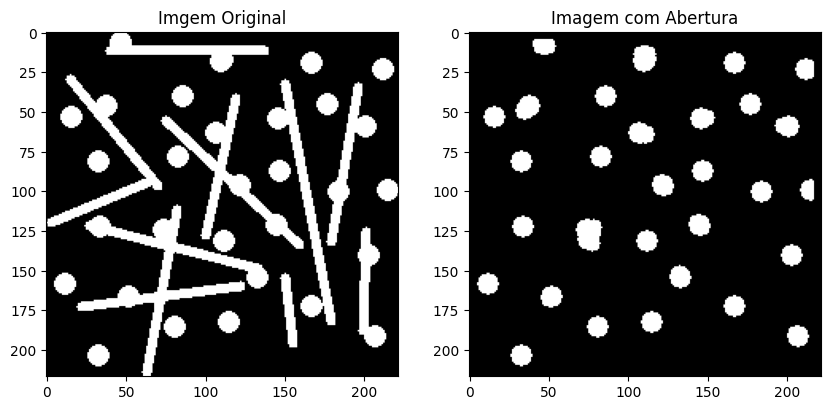

In [2]:
img1 = cv2.imread("img/art3.png", cv2.IMREAD_GRAYSCALE)

def elementoEstruturanteRedondo(raio):
    diametro = 2 * raio + 1
    elemento = np.zeros((diametro, diametro), dtype=np.uint8)

    for i in range(diametro):
        for j in range(diametro):
            if (i - raio)**2 + (j - raio)**2 <= raio**2:
                elemento[i, j] = 1

    return elemento

def erosao(img, elementoEstruturante, elementoEstruturanteCheck):
    imagem_erodida = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
    for y in range(elementoEstruturante.shape[0]//2, img.shape[0] - elementoEstruturante.shape[0]//2):
        for x in range(elementoEstruturante.shape[1]//2, img.shape[1] - elementoEstruturante.shape[1]//2):
            regiao = img[y - elementoEstruturante.shape[0]//2:y + elementoEstruturante.shape[0]//2 + 1, x - elementoEstruturante.shape[1]//2:x + elementoEstruturante.shape[1]//2 + 1]*elementoEstruturante
            if np.all(regiao == elementoEstruturanteCheck):
                imagem_erodida[y, x] = 255
            else:
                imagem_erodida[y, x] = 0
    return imagem_erodida

def dilatacao(img, elementoEstruturante):
    imagem_dilatada = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
    for y in range(elementoEstruturante.shape[0]//2, img.shape[0] - elementoEstruturante.shape[0]//2):
        for x in range(elementoEstruturante.shape[1]//2, img.shape[1] - elementoEstruturante.shape[1]//2):
            regiao = img[y - elementoEstruturante.shape[0]//2:y + elementoEstruturante.shape[0]//2 + 1, x - elementoEstruturante.shape[1]//2:x + elementoEstruturante.shape[1]//2 + 1]*elementoEstruturante
            if np.sum(regiao)>0:
                imagem_dilatada[y,x]=255
    return imagem_dilatada

elementoEstruturanteRaio = 5

elementoEstruturante = elementoEstruturanteRedondo(elementoEstruturanteRaio)
elementoEstruturanteCheck = elementoEstruturante*255

imagem_erodida = erosao(img1, elementoEstruturante, elementoEstruturanteCheck)
imagem_aberta = dilatacao(imagem_erodida, elementoEstruturante)

f, (axarr1, axarr2)  = plt.subplots(1,2, figsize = (10,10))
axarr1.imshow(img1, cmap='gray', vmin=0, vmax=255)
axarr1.title.set_text("Imgem Original")
axarr2.imshow(imagem_aberta, cmap='gray', vmin=0, vmax=255)
axarr2.title.set_text("Imagem com Abertura")

2. 
a) Obter linhas verticais. Abertura com elemento estruturante vertical 3x9 b) Obter linhas horizontais. Abertura com elemento estruturante horizontal 9x3. Tente eliminar as linhas erradas usando uma máscara maior

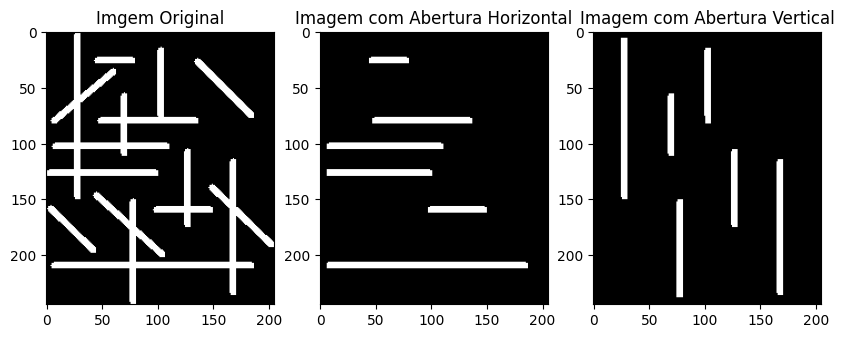

In [3]:
img2 = cv2.imread("img/art2.png", cv2.IMREAD_GRAYSCALE)

elementoEstruturanteH = np.ones((5,13))
elementoEstruturanteCheckH = elementoEstruturanteH*255
elementoEstruturanteV = elementoEstruturanteH.transpose()
elementoEstruturanteCheckV = elementoEstruturanteCheckH.transpose()

imagem_erodida_H = erosao(img2, elementoEstruturanteH, elementoEstruturanteCheckH)
imagem_aberta_H = dilatacao(imagem_erodida_H, elementoEstruturanteH)
imagem_erodida_V = erosao(img2, elementoEstruturanteV, elementoEstruturanteCheckV)
imagem_aberta_V = dilatacao(imagem_erodida_V, elementoEstruturanteV)

f, (axarr1, axarr2, axarr3)  = plt.subplots(1,3, figsize = (10,10))
axarr1.imshow(img2, cmap='gray', vmin=0, vmax=255)
axarr1.title.set_text("Imgem Original")
axarr2.imshow(imagem_aberta_H, cmap='gray', vmin=0, vmax=255)
axarr2.title.set_text("Imagem com Abertura Horizontal")
axarr3.imshow(imagem_aberta_V, cmap='gray', vmin=0, vmax=255)
axarr3.title.set_text("Imagem com Abertura Vertical")

3. 
a) Theshold (t=210)

b) Utilizando abertura com elemento circular de 11 pixels para reter as células grandes

c) É possível reter somente os objetos pequenos utilizando a operação abertura?
R: Somente com a operação de abertura não é possível, pois a informação dos objetos pequenos são as primeiras a serem perdidas. Mas é possível utilizar o resultado da operação de abertura para remover os objetos grandes da imagem original, restando assim os pequenos.

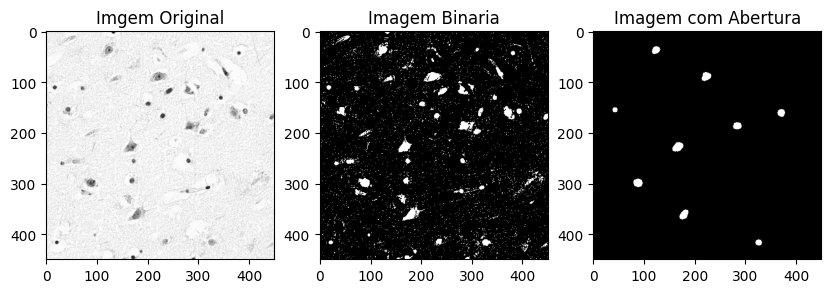

In [4]:
img3 = cv2.imread("img/cel4.png", cv2.IMREAD_GRAYSCALE)
_, img3Binary = cv2.threshold(img3, 210, 255, cv2.THRESH_BINARY)
img3Binary = 255-img3Binary

elementoEstruturanteRaio = 5

elementoEstruturante = elementoEstruturanteRedondo(elementoEstruturanteRaio)
elementoEstruturanteCheck = elementoEstruturante*255

imagem_erodida = erosao(img3Binary, elementoEstruturante, elementoEstruturanteCheck)
imagem_aberta = dilatacao(imagem_erodida, elementoEstruturante)

f, (axarr1, axarr2, axarr3)  = plt.subplots(1,3, figsize = (10,10))
axarr1.imshow(img3, cmap='gray', vmin=0, vmax=255)
axarr1.title.set_text("Imgem Original")
axarr2.imshow(img3Binary, cmap='gray', vmin=0, vmax=255)
axarr2.title.set_text("Imagem Binaria")
axarr3.imshow(imagem_aberta, cmap='gray', vmin=0, vmax=255)
axarr3.title.set_text("Imagem com Abertura")

4. 
Utilizando os conceitos já aprendidos na disciplina, faça um código que calcula a quantidade de objetos da imagem abaixo. Pode-se utilizar funções prontas do opencv (não para realizar a contagem em si, mas para realizar os passos necessários)

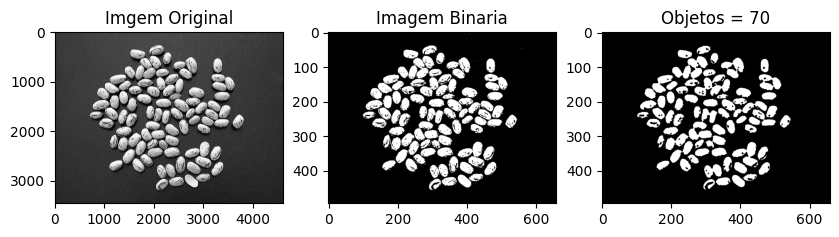

In [40]:
img4 = cv2.imread("img/feijao.jpg", cv2.IMREAD_GRAYSCALE)

def img_resampling(img, jump):
    mtx = img[0:img.shape[0]:jump, 0:img.shape[1]:jump]
    return mtx

def otsu(img):
        imgHist = np.histogram(img, bins=256, range=(0,255))[0]
        imgPint = imgHist*np.arange(256)
        imgHistParc = imgHist[:255]
        imgHistNorm = imgHist/np.sum(imgHist)
        variancia = np.zeros(256)
        for i in range(256):
                probFundo = np.sum(imgHistNorm[:i])
                probObj = 1-probFundo
                m1 = np.sum(imgPint[:i])/probFundo if probFundo>0 else 0
                m2 = np.sum(imgPint[i:])/probObj if probObj>0 else 0
                variancia[i] = probFundo*probObj*((m1-m2)**2)
        return imgHistParc, variancia

def img_object_search(mtx, pixel, label, neighborhood):
    x, y = pixel
    mtx[x, y] = label
    pixelArray = [pixel]
    while pixelArray:
         x, y = pixelArray.pop()
         for i in neighbor(mtx, x, y, neighborhood):
             nx, ny = i
             labeled = mtx[nx, ny]
             if labeled > 0 and labeled != label:
                 mtx[nx, ny] = label
                 pixelArray.append(i)     

def neighbor(mtx, x, y, neighborhood):
    neighbor = []
    if x+1 < mtx.shape[0]:
        if neighborhood == 8 and y+1 < mtx.shape[1]:
            neighbor.append((x+1, y+1))
        neighbor.append((x+1, y))
    if x-1 >= 0:
        if neighborhood == 8 and y-1 >= 0:
            neighbor.append((x-1, y-1))            
        neighbor.append((x-1, y))
    if y+1 < mtx.shape[1]:
        if neighborhood == 8 and x-1 >= 0:
            neighbor.append((x-1, y+1))
        neighbor.append((x, y+1))
    if y-1 >= 0:
        if neighborhood == 8 and x+1 < mtx.shape[0]:
            neighbor.append((x+1, y-1))
        neighbor.append((x, y-1))
    return neighbor

def img_object_count(img):
    mtx = np.matrix(img)
    neighborhood = 8
    label = 10
    objects = 0
    for x in range(mtx.shape[0]):
        for y in range(mtx.shape[1]):
            labeled = mtx[x, y]
            if labeled == 255 and labeled != label:
                objects += 1
                img_object_search(mtx, (x, y), label, neighborhood)
                label += 1
    return objects, mtx

img4Menor = img_resampling(img4, 7)

img4HistParc, img4Variancia = otsu(img4Menor)
_, img4Binary = cv2.threshold(img4Menor, np.argmax(img4Variancia), 255, cv2.THRESH_BINARY)

elementoEstruturanteRaio = 1

elementoEstruturante = elementoEstruturanteRedondo(elementoEstruturanteRaio)
elementoEstruturanteCheck = elementoEstruturante*255

imagem_dilatada = dilatacao(img4Binary, elementoEstruturante)
imagem_erodida = erosao(imagem_dilatada, elementoEstruturante, elementoEstruturanteCheck)
imagem_erodida = erosao(imagem_erodida, elementoEstruturante, elementoEstruturanteCheck)

objects, imgLabeled = img_object_count(imagem_erodida)

f, (axarr1, axarr2, axarr3)  = plt.subplots(1,3, figsize = (10,10))
axarr1.imshow(img4, cmap='gray', vmin=0, vmax=255)
axarr1.title.set_text("Imgem Original")
axarr2.imshow(img4Binary, cmap='gray', vmin=0, vmax=255)
axarr2.title.set_text("Imagem Binaria")
axarr3.imshow(imagem_erodida, cmap='gray', vmin=0, vmax=255)
axarr3.title.set_text("Objetos = "+str(objects))

5. Utilize a transformada hit or miss para localizar o logotipo da UFU. Escolha um deles

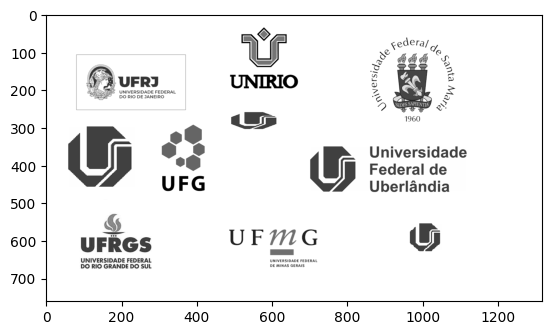

In [ ]:
img5 = cv2.imread("img/logotipos.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img5, cmap='gray', vmin=0, vmax=255)